In [1]:
import numpy as np
import cv2
import reid.datasets
import matplotlib.pyplot as plt
%matplotlib inline
import os.path as osp

from reid.utils.data.dataset import _pluck

In [3]:
OUTPUT_SHAPE = (H, W, _) = (128, 48, 3)

In [4]:
dataset = reid.datasets.VIPeR('./datasets/viper')

Files already downloaded and verified
VIPeR dataset loaded
  subset   | # ids | # images
  ---------------------------
  train    |   216 |      432
  val      |   100 |      200
  trainval |   316 |      632
  query    |   316 |      632
  gallery  |   316 |      632


In [8]:
dataset.train[:10]

[('00000004_00_0000.jpg', 0, 0),
 ('00000004_01_0000.jpg', 0, 1),
 ('00000006_00_0000.jpg', 1, 0),
 ('00000006_01_0000.jpg', 1, 1),
 ('00000007_00_0000.jpg', 2, 0),
 ('00000007_01_0000.jpg', 2, 1),
 ('00000009_00_0000.jpg', 3, 0),
 ('00000009_01_0000.jpg', 3, 1),
 ('00000011_00_0000.jpg', 4, 0),
 ('00000011_01_0000.jpg', 4, 1)]

# Extraindo o dataset

## Treinamento

In [9]:
print('Quantidade de IDs: {}'.format(len(np.unique([x[1] for x in dataset.train]))))

Quantidade de IDs: 216


In [10]:
 def load_img_and_resize(fpath, out_shape=(128, 48, 3)):
    img = cv2.cvtColor(cv2.imread(fpath),cv2.COLOR_BGR2RGB)
    if img.shape != out_shape:
        Ho, Wo, _ = out_shape
        img = cv2.resize(img, (Wo, Ho), interpolation=cv2.INTER_AREA)
    return img.reshape((1,) + out_shape)

In [22]:
X_train = []
y_train = []
cam_ids_train = []
for (fname, pid, cam_id) in dataset.train:
    fpath = osp.join(dataset.root, 'images', fname)
    img = load_img_and_resize(fpath, out_shape=OUTPUT_SHAPE)
    X_train.append(img)
    y_train.append(pid)
    cam_ids_train.append(cam_id)
    
X_train = np.concatenate(X_train, axis=0)
y_train = np.asarray(y_train)
cam_ids_train = np.asarray(cam_ids_train, dtype=np.uint8)

In [17]:
print(len(X_train), X_train.shape, X_train.dtype, X_train.min(), X_train.max())

432 (432, 128, 48, 3) uint8 0 255


In [19]:
print(len(y_train))

432


In [24]:
print(cam_ids_train.shape, cam_ids_train.dtype, cam_ids_train.min(), cam_ids_train.max())

(432,) uint8 0 1


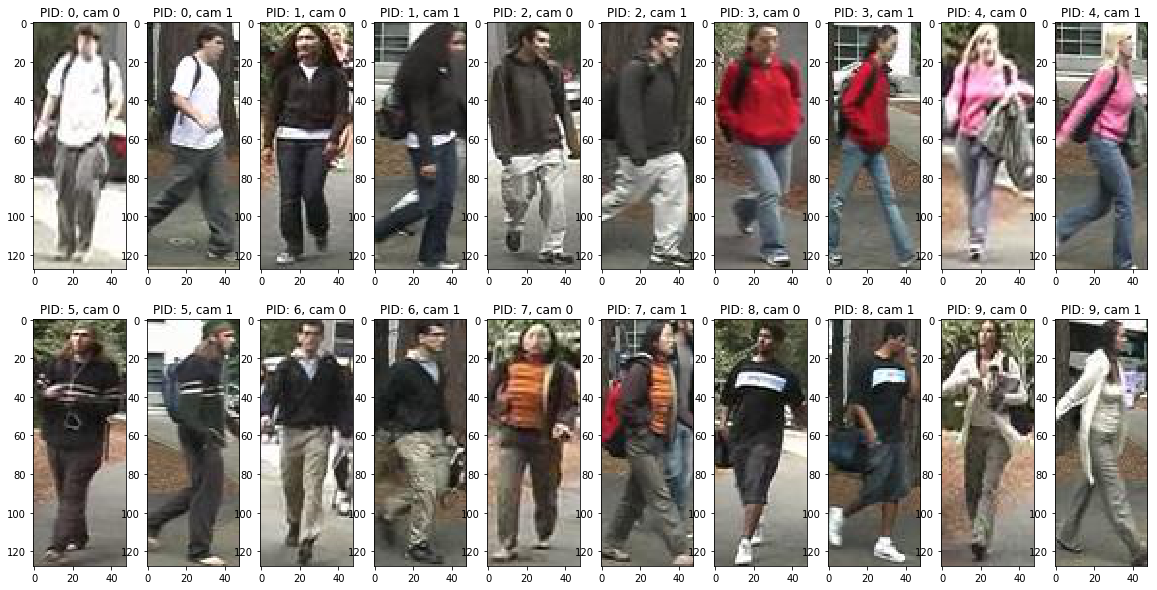

In [25]:
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(2,10,i+1)
    img = X_train[i]
    plt.imshow(img)
    plt.title('PID: {}, cam {}'.format(y_train[i], cam_ids_train[i]))

## Validação

In [26]:
X_val = []
y_val = []
cam_ids_val = []
for (fname, pid, cam_id) in dataset.val:
    fpath = osp.join(dataset.root, 'images', fname)
    img = load_img_and_resize(fpath, out_shape=OUTPUT_SHAPE)
    X_val.append(img)
    y_val.append(pid)
    cam_ids_val.append(cam_id)
    
X_val = np.concatenate(X_val, axis=0)
y_val = np.asarray(y_val)
cam_ids_val = np.asarray(cam_ids_val, dtype=np.uint8)

In [27]:
print(len(X_val), X_val.shape, X_val.dtype, X_val.min(), X_val.max())

200 (200, 128, 48, 3) uint8 0 255


In [28]:
print(y_val.shape, y_val.dtype, y_val.min(), y_val.max())

(200,) int64 0 99


In [29]:
print(cam_ids_val.shape, cam_ids_val.dtype, cam_ids_val.min(), cam_ids_val.max())

(200,) uint8 0 1


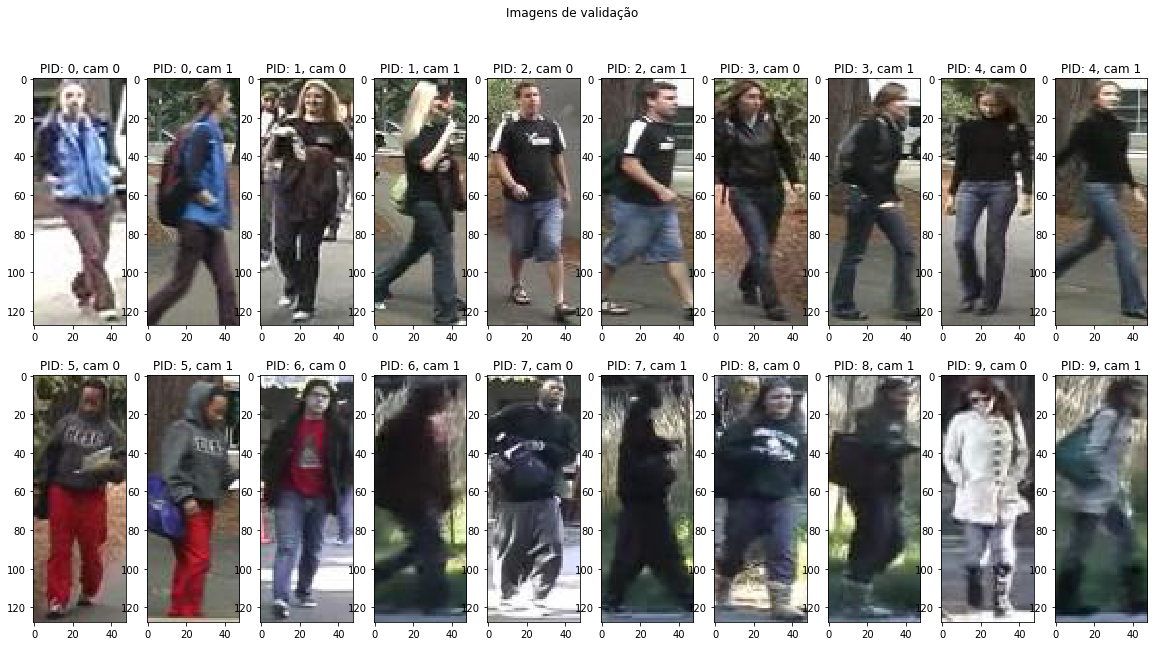

In [32]:
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(2,10,i+1)
    img = X_val[i]
    plt.imshow(img)
    plt.suptitle('Imagens de validação')
    plt.title('PID: {}, cam {}'.format(y_val[i], cam_ids_val[i]))

## Conjunto de Teste (Query e Gallery)

In [40]:
dataset.split['query'] == dataset.split['gallery']

True

In [41]:
test_ids = dataset.split['query']
print('Quantidade de IDs: {}'.format(len(test_ids)))
print(test_ids[:10], '...', test_ids[-10:])

Quantidade de IDs: 316
[0, 2, 3, 5, 8, 10, 12, 17, 18, 20] ... [613, 614, 617, 619, 622, 625, 626, 629, 630, 631]


In [43]:
X_querygal = []
y_querygal = []
cam_ids_querygal = []
for (fname, pid, cam_id) in dataset.query:
    fpath = osp.join(dataset.root, 'images', fname)
    img = load_img_and_resize(fpath, out_shape=OUTPUT_SHAPE)
    X_querygal.append(img)
    y_querygal.append(pid)
    cam_ids_querygal.append(cam_id)
    
X_querygal = np.concatenate(X_querygal, axis=0)
y_querygal = np.asarray(y_querygal)
cam_ids_querygal = np.asarray(cam_ids_querygal, dtype=np.uint8)

In [44]:
print(len(X_querygal), X_querygal.shape, X_querygal.dtype, X_querygal.min(), X_querygal.max())

632 (632, 128, 48, 3) uint8 0 255


In [45]:
print(y_querygal.shape, y_querygal.dtype, y_querygal.min(), y_querygal.max())

(632,) int64 0 631


In [46]:
print(cam_ids_querygal.shape, cam_ids_querygal.dtype, cam_ids_val.min(), cam_ids_val.max())

(632,) uint8 0 1


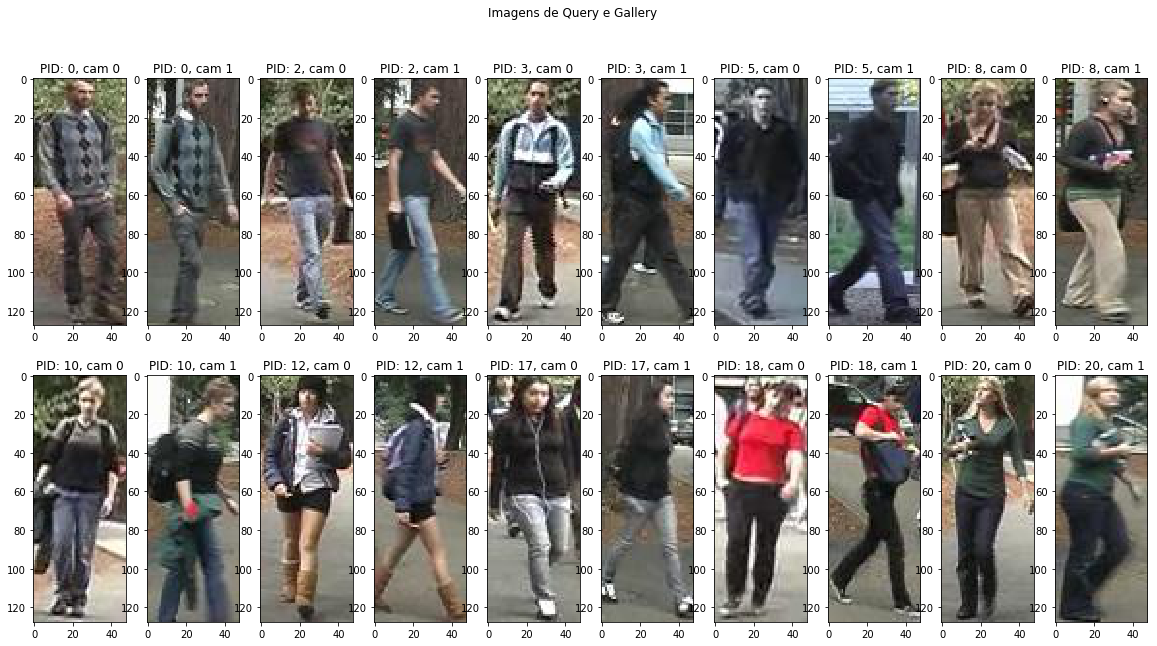

In [47]:
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(2,10,i+1)
    img = X_querygal[i]
    plt.imshow(img)
    plt.suptitle('Imagens de Query e Gallery')
    plt.title('PID: {}, cam {}'.format(y_querygal[i], cam_ids_querygal[i]))

# Salva o arquivo npz

In [48]:
np.savez('./datasets/viper_train_correct', X_train=X_train, y_train=y_train, cam_ids_train=cam_ids_train, X_val=X_val, y_val=y_val, cam_ids_val=cam_ids_val)

In [49]:
np.savez('./datasets/viper_test_correct', X_querygal=X_querygal, y_querygal=y_querygal, cam_ids_querygal=cam_ids_querygal)

In [50]:
data = np.load('./datasets/viper_train_correct.npz')
data.files

['X_train', 'y_val', 'X_val', 'y_train', 'cam_ids_train', 'cam_ids_val']

In [51]:
data = np.load('./datasets/viper_test_correct.npz')
data.files

['X_querygal', 'cam_ids_querygal', 'y_querygal']